# 基于 *Python Matplotlib* 的 2维距离热图

## 0 加载数据包

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.tri as tri
import numpy as np

## 1 文件读写

In [3]:
Pikco = np.loadtxt("PIK_C4_O5_dist_6X.txt")
Pikno = np.loadtxt("PIK_NE2_O5_dist_6X.txt")
Tmcco = np.loadtxt("TMC_C4_O5_dist_6X.txt")
Tmcno = np.loadtxt("TMC_NE2_O5_dist_6X.txt")

## 2 简单散点图验证

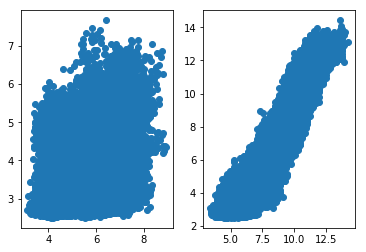

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.plot(Pikco[:,1],Pikno[:,1], 'o')
ax2.plot(Tmcco[:,1],Tmcno[:,1], 'o')
#ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

## 3 初步热图实现

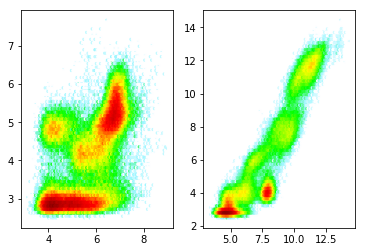

In [48]:
fig,(ax1,ax2) = plt.subplots(ncols=2)

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)


ax1.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax2.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
plt.show()

## 4 细节调整

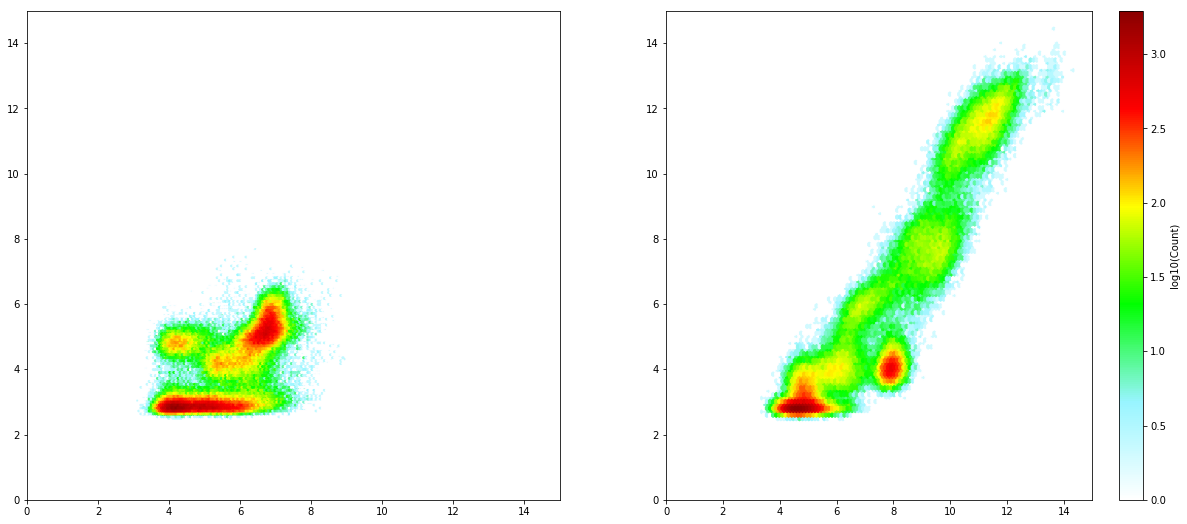

In [12]:
fig,axs = plt.subplots(ncols=2,figsize=(21,9))

def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)

ax = axs[0]
hb = ax.hexbin(Pikco[:,1], Pikno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))

ax = axs[1]
hb = ax.hexbin(Tmcco[:,1], Tmcno[:,1], bins='log', cmap=colormap())
ax.axis((0,15,0,15))
cb = fig.colorbar(hb,ax=ax)
cb.set_label('log10(Count)')

plt.show()

## 5 整合函数化